# ICTP Workshop on Data-Driven Research

## Problem definition

We would like to explore some cross sections from the [Electron-Impact Vibrational Excitation](https://db-amdis.org/hcdb/t/24897) of `H2 X(v=0) -> a(v=vf)`

* vf = 0: https://db-amdis.org/hcdb/data/e-mol/e-mol-ve/e-H2-ve/scarlett/vi=0/X-a3Sg/MCCC-el-H2-a3Sg_vf=0.X1Sg_vi=0.txt
* vf = 1: https://db-amdis.org/hcdb/data/e-mol/e-mol-ve/e-H2-ve/scarlett/vi=0/X-a3Sg/MCCC-el-H2-a3Sg_vf=1.X1Sg_vi=0.txt
* vf = 2: https://db-amdis.org/hcdb/data/e-mol/e-mol-ve/e-H2-ve/scarlett/vi=0/X-a3Sg/MCCC-el-H2-a3Sg_vf=2.X1Sg_vi=0.txt

Same thing, but to the `B(v=vf)` electronic state:

* vf = 0: https://db-amdis.org/hcdb/data/e-mol/e-mol-ve/e-H2-ve/scarlett/vi=0/X-B1Su/MCCC-el-H2-B1Su_vf=0.X1Sg_vi=0.txt
* vf = 1: https://db-amdis.org/hcdb/data/e-mol/e-mol-ve/e-H2-ve/scarlett/vi=0/X-B1Su/MCCC-el-H2-B1Su_vf=1.X1Sg_vi=0.txt
* vf = 2: https://db-amdis.org/hcdb/data/e-mol/e-mol-ve/e-H2-ve/scarlett/vi=0/X-B1Su/MCCC-el-H2-B1Su_vf=2.X1Sg_vi=0.txt


## Solution exploration A

### 1. Read and display the raw data for each individual file

In [1]:
DATA_URL = "https://db-amdis.org/hcdb/data/e-mol/e-mol-ve/e-H2-ve/scarlett/vi=0/X-{state}/MCCC-el-H2-{state}_vf={vf}.X1Sg_vi=0.txt"

DATA_PATHS = [DATA_URL.format(state=state, vf=vf) for state in ["a3Sg","B1Su"] for vf in range(0, 3)]

print(*DATA_PATHS, sep = "\n")

https://db-amdis.org/hcdb/data/e-mol/e-mol-ve/e-H2-ve/scarlett/vi=0/X-a3Sg/MCCC-el-H2-a3Sg_vf=0.X1Sg_vi=0.txt
https://db-amdis.org/hcdb/data/e-mol/e-mol-ve/e-H2-ve/scarlett/vi=0/X-a3Sg/MCCC-el-H2-a3Sg_vf=1.X1Sg_vi=0.txt
https://db-amdis.org/hcdb/data/e-mol/e-mol-ve/e-H2-ve/scarlett/vi=0/X-a3Sg/MCCC-el-H2-a3Sg_vf=2.X1Sg_vi=0.txt
https://db-amdis.org/hcdb/data/e-mol/e-mol-ve/e-H2-ve/scarlett/vi=0/X-B1Su/MCCC-el-H2-B1Su_vf=0.X1Sg_vi=0.txt
https://db-amdis.org/hcdb/data/e-mol/e-mol-ve/e-H2-ve/scarlett/vi=0/X-B1Su/MCCC-el-H2-B1Su_vf=1.X1Sg_vi=0.txt
https://db-amdis.org/hcdb/data/e-mol/e-mol-ve/e-H2-ve/scarlett/vi=0/X-B1Su/MCCC-el-H2-B1Su_vf=2.X1Sg_vi=0.txt


In [2]:
import pandas as pd

[Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) about `panda.read_csv()`

In [8]:
df = pd.read_csv(DATA_PATHS[1], comment='#', sep='\s+', header=None, names=["Energy", "CS"])
df #entire data

#df.Energy # view only the energies
#df.CS # view only the cross sections
#df.CS[2] # one data point


,Energy,CS
0,12.1066,0.000000
1,12.5000,0.120209
2,13.0000,0.139040
3,13.5000,0.137791
4,14.0000,0.131501
5,14.5000,0.122686
6,15.0000,0.113616
7,15.5000,0.104798
8,16.0000,0.096508
9,16.5000,0.088829


### 2. Save the data

In [4]:
#help(df.to_csv)
df.to_csv("text.csv", index = False)

### 3. Visualization

[Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

Plotting methods allow for multiple plot styles (default is the `line` style). These methods can be provided as the kind keyword argument to `plot()`, and include:

* `bar` or `barh` for bar plots
* `hist` for histogram
* `box` for boxplot
* `kde` or `density` for density plots
* `area` for area plots
* `scatter` for scatter plots
* `hexbin` for hexagonal bin plots
* `pie` for pie plots


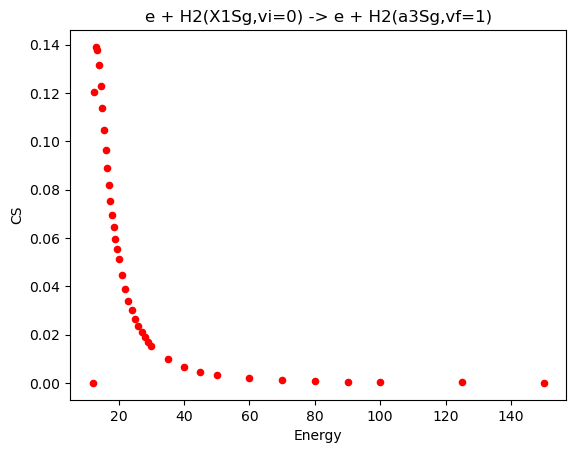

In [5]:
import matplotlib.pyplot as plt

df.plot(kind='scatter', x='Energy', y='CS', color='red')
plt.title("e + H2(X1Sg,vi=0) -> e + H2(a3Sg,vf=1)")
plt.savefig('a3Sg_vf1_plot.png')
plt.show()

## Solution exploration B

### 1. Read and display all the data 

In [6]:
DATA_URL = "https://db-amdis.org/hcdb/data/e-mol/e-mol-ve/e-H2-ve/scarlett/vi=0/X-{state}/MCCC-el-H2-{state}_vf={vf}.X1Sg_vi=0.txt"

import collections
DATA = collections.defaultdict(dict)

for state in ["a3Sg","B1Su"]:
    for vf in range(0, 3):
        url = DATA_URL.format(state=state, vf=vf)
        DATA[state][vf] = pd.read_csv(url, comment='#', sep='\s+', header=None, names=["Energy", "CS"])

#print(*DATA.items(), sep = "\n")

### 2. Visualize all data

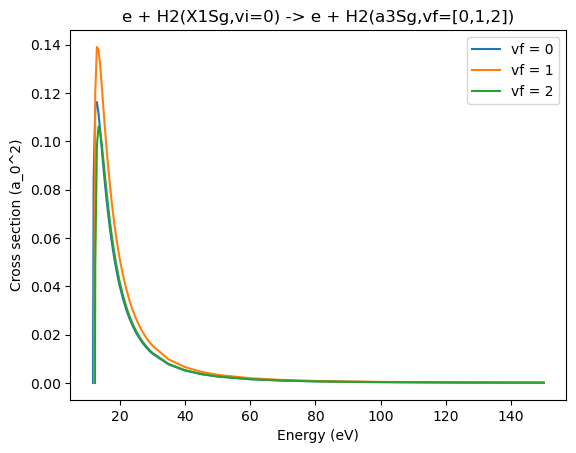

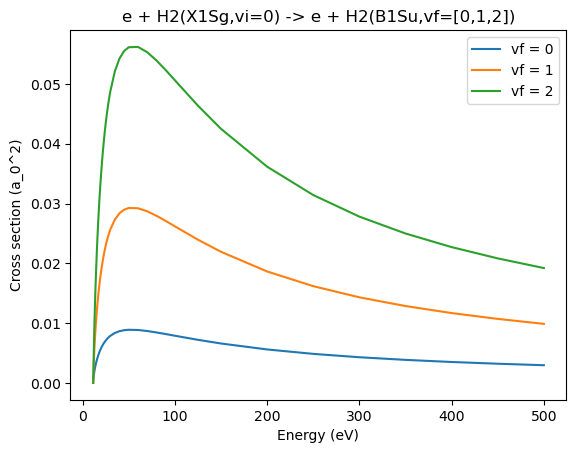

In [7]:
for state in DATA.keys():
    fig, ax = plt.subplots()
    for vf in DATA[state]:
        ax.plot(DATA[state][vf]["Energy"], DATA[state][vf]["CS"], label="vf = {}".format(vf))    
    ax.set_title("e + H2(X1Sg,vi=0) -> e + H2({state},vf=[0,1,2])".format(state=state))
    ax.set_xlabel("Energy (eV)")
    ax.set_ylabel("Cross section (a_0^2)")
    ax.legend()
    plt.show()